In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import pandas_profiling
import math
from sklearn import linear_model
from sklearn.metrics import r2_score

import plotly.graph_objs as go
from datetime import datetime

import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
# tls.set_credentials_file(username='VIvidh',api_key='5RTkH4bVaeoz7EkYo2ce')
tls.set_credentials_file(username='khajanchi.a',api_key='wT2YKtKVrzkjNzaOGCrF')

In [121]:
#Loading all the csv files
df_bitcoin = pd.read_excel("BITCOIN_FINAL.xlsx")
df_ethereum = pd.read_excel("ETHEREUM.xlsx")
df_litecoin = pd.read_excel("LITECOIN.xlsx")

In [122]:
df_bitcoin.describe()

,Open,High,Low,Close,Market Cap
count,2048.000000,2048.000000,2048.000000,2048.000000,2.048000e+03
mean,2290.725952,2359.822891,2212.478809,2292.293672,3.794584e+10
std,3434.994489,3560.133187,3282.145547,3434.576427,5.847555e+10
min,68.500000,74.560000,65.530000,68.430000,7.784112e+08
25%,321.835000,329.505000,313.847500,322.402500,4.397783e+09
50%,600.780000,608.195000,587.685000,600.960000,8.194044e+09
75%,2680.025000,2764.075000,2582.065000,2675.537500,4.399961e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,3.265025e+11


In [123]:
df_bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-12-05,3958.89,3969.54,3753.99,3753.99,5302481574,65352496336
1,2018-12-04,3886.29,4075.63,3832.75,3956.89,5028069239,68878292608
2,2018-12-03,4147.32,4155.98,3840.45,3894.13,5089570994,67779050170
3,2018-12-02,4200.73,4301.52,4110.98,4139.88,5262697895,72050487506
4,2018-12-01,4024.46,4309.38,3969.71,4214.67,5375314093,73346194969


In [124]:
df_bitcoin = df_bitcoin[df_bitcoin["Volume"] != '-']

In [125]:
df_bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-12-05,3958.89,3969.54,3753.99,3753.99,5302481574,65352496336
1,2018-12-04,3886.29,4075.63,3832.75,3956.89,5028069239,68878292608
2,2018-12-03,4147.32,4155.98,3840.45,3894.13,5089570994,67779050170
3,2018-12-02,4200.73,4301.52,4110.98,4139.88,5262697895,72050487506
4,2018-12-01,4024.46,4309.38,3969.71,4214.67,5375314093,73346194969


In [126]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1805 entries, 0 to 1804
Data columns (total 7 columns):
Date          1805 non-null datetime64[ns]
Open          1805 non-null float64
High          1805 non-null float64
Low           1805 non-null float64
Close         1805 non-null float64
Volume        1805 non-null object
Market Cap    1805 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 112.8+ KB


In [127]:
df_bitcoin['Volume'] = df_bitcoin['Volume'].astype(float)

In [128]:
df_bitcoin['Avg_Price'] = (2 * df_bitcoin['Close'] + df_bitcoin['High'] + df_bitcoin['Low']) / 4

In [129]:
df_bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Avg_Price
0,2018-12-05,3958.89,3969.54,3753.99,3753.99,5.302482e+09,65352496336,3807.8775
1,2018-12-04,3886.29,4075.63,3832.75,3956.89,5.028069e+09,68878292608,3955.5400
2,2018-12-03,4147.32,4155.98,3840.45,3894.13,5.089571e+09,67779050170,3946.1725
3,2018-12-02,4200.73,4301.52,4110.98,4139.88,5.262698e+09,72050487506,4173.0650
4,2018-12-01,4024.46,4309.38,3969.71,4214.67,5.375314e+09,73346194969,4177.1075


In [130]:
# from sklearn.preprocessing import StandardScaler
# from math import sqrt
# df_bitcoin_n = df_bitcoin.drop(['Date'], axis=1)
# normalise = StandardScaler().fit_transform(df_bitcoin_n.values)
# normalise

In [131]:
df_bitcoin.describe()

,Open,High,Low,Close,Volume,Market Cap,Avg_Price
count,1805.000000,1805.000000,1805.000000,1805.000000,1.805000e+03,1.805000e+03,1805.000000
mean,2566.128000,2642.618111,2479.409817,2567.579989,1.658336e+09,4.265898e+10,2564.296976
std,3569.236492,3700.883184,3408.055489,3568.838206,3.193376e+09,6.075554e+10,3560.177974
min,176.900000,211.730000,171.510000,178.100000,2.857830e+06,2.444379e+09,187.900000
25%,391.690000,402.810000,380.830000,391.440000,2.645690e+07,5.623196e+09,391.865000
50%,633.430000,643.950000,624.090000,633.020000,7.406470e+07,9.575632e+09,634.802500
75%,4137.600000,4255.780000,3969.710000,4139.880000,1.905040e+09,6.890735e+10,4145.015000
max,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.265025e+11,19336.175000


In [132]:
data = [go.Scatter(x=df_bitcoin.Date, y=df_bitcoin.Avg_Price)]
py.iplot(data)

In [133]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
NewDf = df_bitcoin['Volume'].groupby(df_bitcoin.Date.dt.year).mean()

In [134]:
NewDf

Date
2013    2.799696e+07
2014    2.509365e+07
2015    3.390557e+07
2016    8.592451e+07
2017    2.382867e+09
2018    6.107457e+09
Name: Volume, dtype: float64

In [135]:
NewDf.iplot(kind='bar')

In [136]:
df_bitcoin.skew()

Open          1.832561
High          1.872715
Low           1.762166
Close         1.831441
Volume        2.847629
Market Cap    1.791423
Avg_Price     1.821598
dtype: float64

In [137]:
df_bitcoin.kurt()

Open           3.108727
High           3.328618
Low            2.714206
Close          3.106492
Volume        10.094159
Market Cap     2.863790
Avg_Price      3.041798
dtype: float64

In [138]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

In [139]:
mean = df_bitcoin.Avg_Price.mean()
std = df_bitcoin.Avg_Price.std()

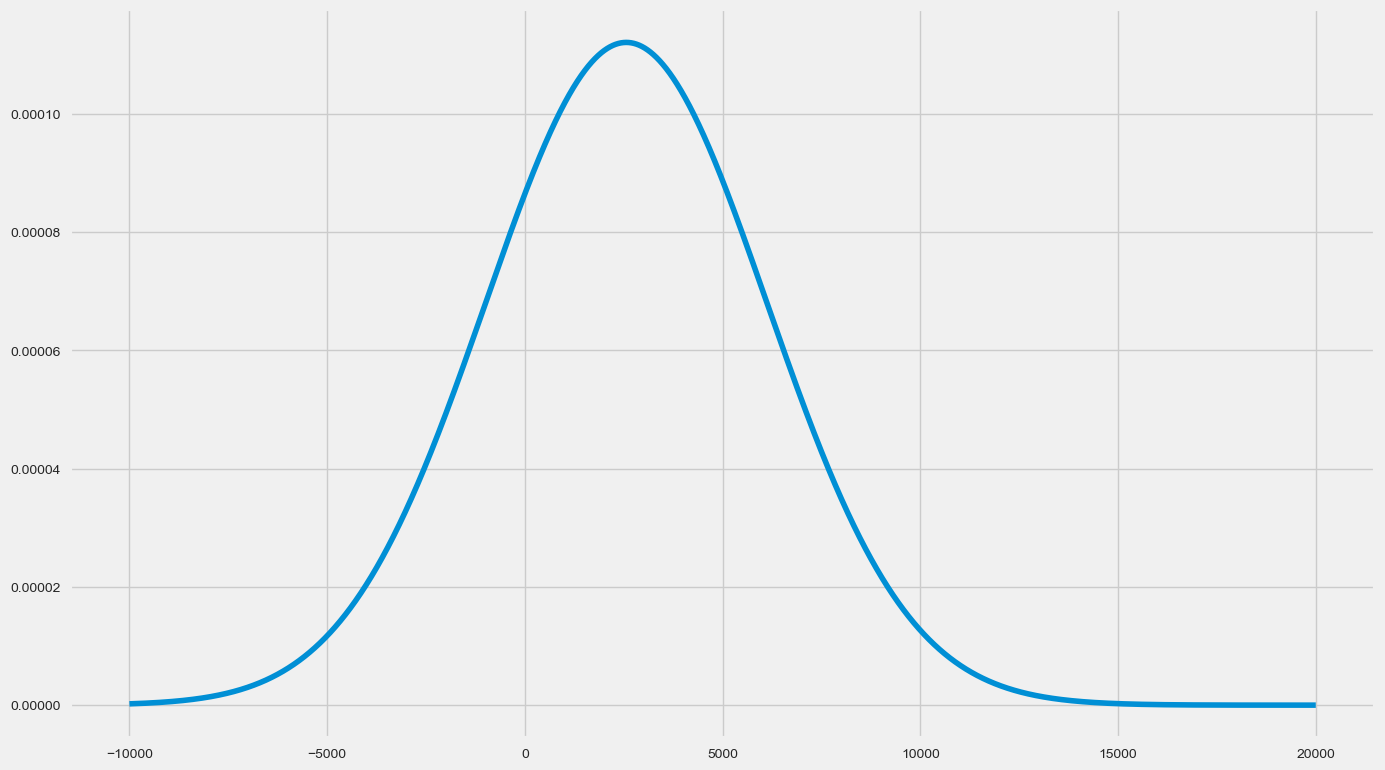

In [140]:
plt.rcParams['figure.figsize'] = (15, 9)

x = np.arange(-10000,20000,0.1)
y = normfun(x, mean, std) 
plt.plot(x,y)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



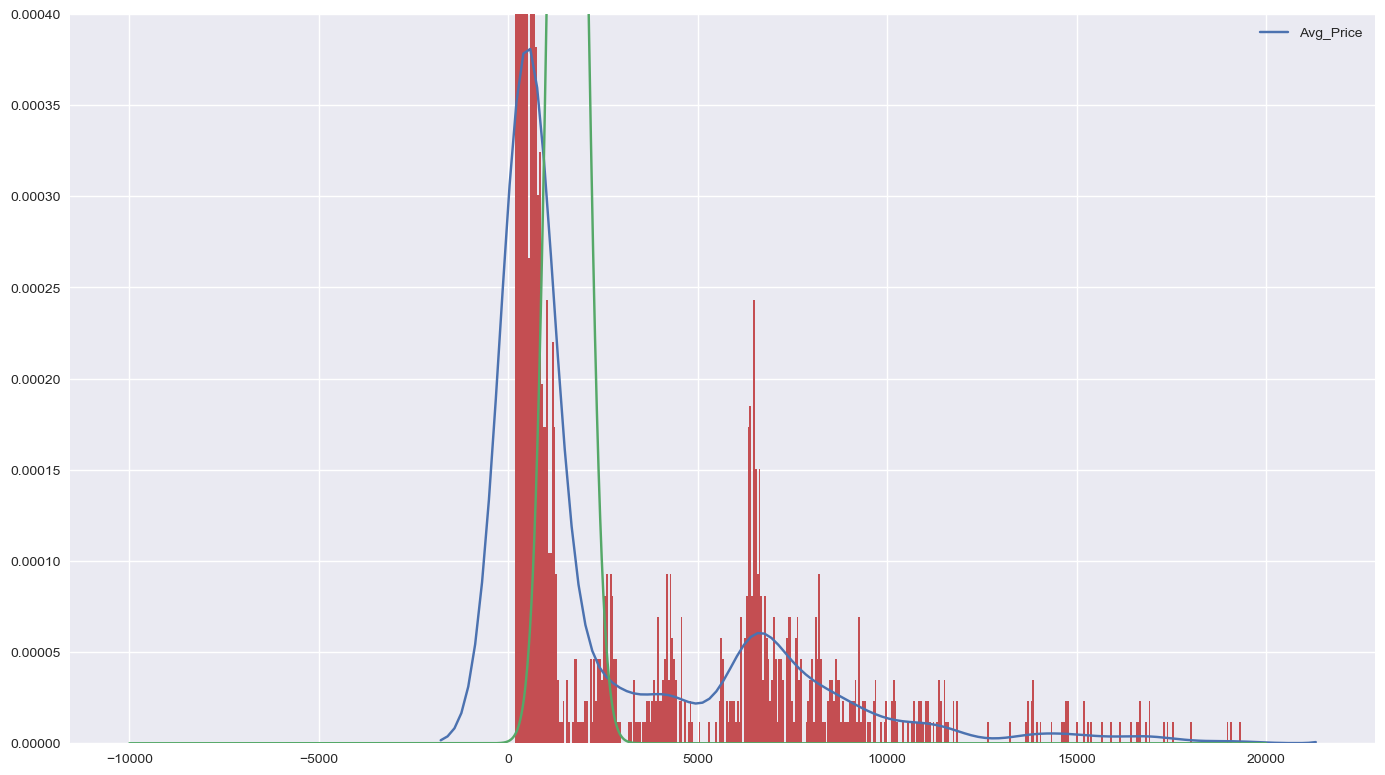

In [141]:
plt.rcParams['figure.figsize'] = (15, 9)

sns.set(color_codes=True)
ax = sns.kdeplot(df_bitcoin.Avg_Price)
y = normfun(x, mean-1000, 0.12*std) 
plt.plot(x,y)
plt.hist(df_bitcoin.Avg_Price, bins=400, rwidth=1, normed=True)
plt.show()

In [142]:
df_bitcoin.iloc[df_bitcoin["Volume"].idxmax()]

Date          2018-01-05 00:00:00
Open                      15477.2
High                      17705.2
Low                       15202.8
Close                     17429.5
Volume                2.38409e+10
Market Cap           292544135538
Avg_Price                 16941.8
Name: 334, dtype: object

In [143]:
df_bitcoin.iloc[df_bitcoin["Volume"].idxmin()]

Date          2014-05-18 00:00:00
Open                        448.7
High                       449.77
Low                        444.78
Close                      446.26
Volume                2.85783e+06
Market Cap             5706165793
Avg_Price                 446.767
Name: 1662, dtype: object

In [144]:
df_bitcoin['logVol'] = np.log(df_bitcoin['Volume'])
df_bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Avg_Price,logVol
0,2018-12-05,3958.89,3969.54,3753.99,3753.99,5.302482e+09,65352496336,3807.8775,22.391441
1,2018-12-04,3886.29,4075.63,3832.75,3956.89,5.028069e+09,68878292608,3955.5400,22.338302
2,2018-12-03,4147.32,4155.98,3840.45,3894.13,5.089571e+09,67779050170,3946.1725,22.350459
3,2018-12-02,4200.73,4301.52,4110.98,4139.88,5.262698e+09,72050487506,4173.0650,22.383910
4,2018-12-01,4024.46,4309.38,3969.71,4214.67,5.375314e+09,73346194969,4177.1075,22.405083


In [145]:
pandas_profiling.ProfileReport(df_bitcoin)

Number of variables,9
Number of observations,1805
Total Missing (%),0.0%
Total size in memory,221.0 KiB
Average record size in memory,125.4 B
Numeric,2
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,6


In [146]:
Close_Price = df_bitcoin['Close']
price_today = Close_Price[1:].values.reshape(-1,1)
price_previous = Close_Price[0:-1].values.reshape(-1,1)
Return = np.log(price_today/price_previous)
Return

array([[ 0.05263909],
       [-0.01598807],
       [ 0.06119651],
       ...,
       [-0.01476199],
       [-0.02338383],
       [ 0.00989823]])

## Calculate OLS :
The OLS estimater is:
$$\hat{\beta}=(X`X)^{-1}X`Y$$

In [147]:
data = df_bitcoin[['Volume','Market Cap']].values

In [148]:
N = 2 + 1 # we only have 2 variables: Volume and market Cap 

def OLS(X,Y):
    
    nrow = X.shape[0]
    intercept = np.ones((nrow,1))
    predictor1 = X[:,0].reshape(-1,1)
    predictor2 = X[:,1].reshape(-1,1)
    
    X = np.concatenate((intercept, predictor1, predictor2), axis=1)
    
    ## Use the equation (X'X)^(-1)X'Y to calculate OLS coefficient estimates:
    bh = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
    print('OLS coefficient estimates:       {}'.format(bh.T))
    
    ## check your work with Numpy's built in OLS function:
    z,resid,rank,sigma = np.linalg.lstsq(X,Y)
    print('check with build in OLS function:{}'.format(z.T))
    
    return bh.T

In [149]:
bh = OLS(data[1:],Return) # we use all data except first day

OLS coefficient estimates:       [[-1.27221657e-03  8.62933580e-13 -2.48780570e-14]]
check with build in OLS function:[[-1.27221657e-03  8.62933580e-13 -2.48780570e-14]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



## Calculate T-test scores :  
The associated test statistic:  
$$t=\frac{\hat{\beta}}{\sigma(\hat{\beta})}$$
T-test result implies significance of the single tested variable.

### Covariance Matrix
Firstly, we need to calculate covariance matrix of $var(\hat{\beta}) = \begin{bmatrix}\sigma(\hat{\beta_0})^2 & cov(\hat{\beta_0},\hat{\beta_1}) & cov(\hat{\beta_0},\hat{\beta_2})\\cov(\hat{\beta_1},\hat{\beta_0}) & \sigma(\hat{\beta_1})^2 & cov(\hat{\beta_1},\hat{\beta_2})\\cov(\hat{\beta_2},\hat{\beta_0}) & cov(\hat{\beta_2},\hat{\beta_1}) & \sigma(\hat{\beta_2})^2\end{bmatrix}$  
Note that $cov(\hat{\beta_0},\hat{\beta_1})=cov(\hat{\beta_1},\hat{\beta_0})$，so here we get a **Symmetric Matrices**  
For multivariate regression, we use formula below to get $var(\hat{\beta})$ :
$$var(\hat{\beta})=(X`X)^{-1}X`var(\epsilon)X(X`X)^{-1}=var(\epsilon)(X`X)^{-1}$$  
where 
$$var(\epsilon)=\frac{1}{T-N}\sum_{t=1}^T\hat{\epsilon_t}^2$$  

In [150]:
intercept = np.ones((data.shape[0],1))
volume = data[:,0].reshape(-1,1)
mkt_cap = data[:,1].reshape(-1,1)
variables_matrix = np.concatenate((intercept, volume, mkt_cap), axis=1)

In [151]:
variables_matrix = variables_matrix[1:] # count from the second day data to match return
print(variables_matrix)
print("The shape of matrix: {}".format(variables_matrix.shape))

[[1.00000000e+00 5.02806924e+09 6.88782926e+10]
 [1.00000000e+00 5.08957099e+09 6.77790502e+10]
 [1.00000000e+00 5.26269790e+09 7.20504875e+10]
 ...
 [1.00000000e+00 1.90113000e+07 9.08210362e+09]
 [1.00000000e+00 3.25058000e+07 8.86991864e+09]
 [1.00000000e+00 4.68627000e+07 8.95539456e+09]]
The shape of matrix: (1804, 3)


In [152]:
predictions = np.dot(variables_matrix,bh.T) # calculate predictions using coefficiencies (bh)
epsilon_hat_square_sum = sum((Return-predictions)**2) # calculate sum of square errors
var_epsilon = (epsilon_hat_square_sum/(variables_matrix.shape[0]-variables_matrix.shape[1]))[0]
print(var_epsilon)

0.001564383070836741


In [153]:
X = variables_matrix

var_beta_hat = np.mat(np.dot(X.T,X)).I*var_epsilon
print(var_beta_hat)

[[ 1.43673487e-06  3.18547889e-16 -2.57272882e-17]
 [ 3.18547889e-16  7.13291585e-25 -3.51725898e-26]
 [-2.57272882e-17 -3.51725898e-26  1.96931557e-27]]


In [154]:
np.mat(np.dot(X.T,X))

matrix([[1.80400000e+03, 2.98799487e+12, 7.69341128e+13],
        [2.98799487e+12, 2.33323403e+22, 4.55758263e+23],
        [7.69341128e+13, 4.55758263e+23, 9.93943678e+24]])

In [155]:
t_beta0 = bh[0][0]/math.sqrt(np.array(var_beta_hat[0])[0][0])
t_beta1 = bh[0][1]/math.sqrt(np.array(var_beta_hat[1])[0][1])
t_beta2 = bh[0][2]/math.sqrt(np.array(var_beta_hat[2])[0][2])
print('T test for beta_0: %.4f ; t for beta_1: %.4f ; t for beta_3: %.4f.'%(t_beta0,t_beta1,t_beta2))

T test for beta_0: -1.0614 ; t for beta_1: 1.0217 ; t for beta_3: -0.5606.


## Calculate R<sup>2</sup> :
$$R^2 = 1-\frac{SSE}{SSY} = 1-\frac{\sum_{t=1}^T{(Y_i-\hat{Y}_i)^2}}{\sum_{t=1}^T(Y_i-\bar{Y})^2}$$

In [156]:
# Sum of Squared errors
SSE = epsilon_hat_square_sum[0]
print(SSE)

2.8174539105769703


In [157]:
# Sum of Squared deviation of Y
SSY = ((Return - Return.mean())**2).sum()
print(SSY)

2.821166850296025


In [158]:
R2 = 1 - SSE/SSY
print(R2)

0.001316100718631752


## Checking our R2 correctness Model with Linear Regression Model

In [159]:
regr = linear_model.LinearRegression(normalize = True)
X = data[1:]
# Train the model using the training sets
regr.fit(X, Return)
y_hat = regr.predict(X)
r2 = r2_score(Return, y_hat)
print('Our R2 score: %.8f ; build in R2 score: %.8f'%(R2,r2))

Our R2 score: 0.00131610 ; build in R2 score: 0.00131610


## Calculate F test score:
F-test equation is below:
$$F = \frac{{R^2}/(N-1)}{(1-R^2)/(T-N)}$$
* N-1 is the number of variables (in our example, N = 3)
* T is the number of total observations
* in here $R^2$ is **NOT** $R$ with power 2; instead it is R squared score as we will calculate latter

In [160]:
F_r2 = (R2/(N-1))/((1-R2**2)/(Return.size-N))
print(F_r2)

1.1851507499525151


In [161]:
MSE = var_epsilon
print(MSE)

0.001564383070836741


In [162]:
MSM = (sum((predictions - Return.mean())**2) / (N-1))[0]
print(MSM)

0.0018564698595282944


In [163]:
F = MSM/MSE
print(F) # this is different from F_r2, probably because of approximation problem

1.1867105277068264


In [164]:
tt = var_beta_hat[1:,1:]

In [165]:
th = bh[0][1:].reshape(1,-1)

In [166]:
th*tt.I*th.T/2

matrix([[1.18671053]])

In [167]:
MSM = th*tt.I*th.T/2
MSE = var_epsilon
F = MSM / MSE
F = np.array(F)[0][0] # extract scalar value from matrix format
print(F) # this value is too much away from F values above

758.5805227821122


- If we use var_beta_hat of $\hat{\beta}_1$ and $\hat{\beta}_2$:   $\begin{bmatrix}\hat{\beta}_1 & \hat{\beta}_2\end{bmatrix}\begin{bmatrix}\sigma(\hat{\beta}_1)^2 & cov(\hat{\beta}_1,\hat{\beta}_2) \\ cov(\hat{\beta}_2,\hat{\beta}_1) & \sigma(\hat{\beta}_2)^2\end{bmatrix}\begin{bmatrix}\hat{\beta}_1 \\ \hat{\beta}_2\end{bmatrix}$  
We directly get the same result of F score. So $V_m(\hat{\beta})$ must not be $\begin{bmatrix}\sigma(\hat{\beta}_1)^2 & cov(\hat{\beta}_1,\hat{\beta}_2) \\ cov(\hat{\beta}_2,\hat{\beta}_1) & \sigma(\hat{\beta}_2)^2\end{bmatrix}$, otherwise we need to divided by MSE.  
One possibility is that $V_m(\hat{\beta}) = var(\epsilon)*\begin{bmatrix}\sigma(\hat{\beta}_1)^2 & cov(\hat{\beta}_1,\hat{\beta}_2) \\ cov(\hat{\beta}_2,\hat{\beta}_1) & \sigma(\hat{\beta}_2)^2\end{bmatrix}$ if "two inverse matrix equal => these two matrix are equal" holds, which I'm not sure.

### Bollinger Band

In [168]:
df_bitcoin['Previous Close']=df_bitcoin['Close'].shift(1)
df_bitcoin['Previous Volume']=df_bitcoin['Volume'].shift(1)
df_bitcoin.fillna(0, inplace=True)
df_bitcoin.head(5)


,Date,Open,High,Low,Close,Volume,Market Cap,Avg_Price,logVol,Previous Close,Previous Volume
0,2018-12-05,3958.89,3969.54,3753.99,3753.99,5.302482e+09,65352496336,3807.8775,22.391441,0.00,0.000000e+00
1,2018-12-04,3886.29,4075.63,3832.75,3956.89,5.028069e+09,68878292608,3955.5400,22.338302,3753.99,5.302482e+09
2,2018-12-03,4147.32,4155.98,3840.45,3894.13,5.089571e+09,67779050170,3946.1725,22.350459,3956.89,5.028069e+09
3,2018-12-02,4200.73,4301.52,4110.98,4139.88,5.262698e+09,72050487506,4173.0650,22.383910,3894.13,5.089571e+09
4,2018-12-01,4024.46,4309.38,3969.71,4214.67,5.375314e+09,73346194969,4177.1075,22.405083,4139.88,5.262698e+09


In [169]:
from pandas import DatetimeIndex
df_bitcoin.index = DatetimeIndex(df_bitcoin['Date'])

In [170]:
ExData = df_bitcoin

In [171]:
ExData.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Avg_Price,logVol,Previous Close,Previous Volume
Date,,,,,,,,,,,
2018-12-05,2018-12-05,3958.89,3969.54,3753.99,3753.99,5.302482e+09,65352496336,3807.8775,22.391441,0.00,0.000000e+00
2018-12-04,2018-12-04,3886.29,4075.63,3832.75,3956.89,5.028069e+09,68878292608,3955.5400,22.338302,3753.99,5.302482e+09
2018-12-03,2018-12-03,4147.32,4155.98,3840.45,3894.13,5.089571e+09,67779050170,3946.1725,22.350459,3956.89,5.028069e+09
2018-12-02,2018-12-02,4200.73,4301.52,4110.98,4139.88,5.262698e+09,72050487506,4173.0650,22.383910,3894.13,5.089571e+09
2018-12-01,2018-12-01,4024.46,4309.38,3969.71,4214.67,5.375314e+09,73346194969,4177.1075,22.405083,4139.88,5.262698e+09


In [172]:
Predict = pd.DataFrame()
Predict['Close']=df_bitcoin['Close']
Predict['Previous Close']=ExData['Previous Close']
Predict['Previous Volume']=ExData['Previous Volume']
Predict.head()

,Close,Previous Close,Previous Volume
Date,,,
2018-12-05,3753.99,0.00,0.000000e+00
2018-12-04,3956.89,3753.99,5.302482e+09
2018-12-03,3894.13,3956.89,5.028069e+09
2018-12-02,4139.88,3894.13,5.089571e+09
2018-12-01,4214.67,4139.88,5.262698e+09


In [173]:
X = Predict.iloc[:,1:].values
y = Predict.iloc[:,0].values

In [174]:
y = y.reshape(len(X), 1)

In [175]:
beta_hat = np.dot(np.dot((np.linalg.inv(np.dot(X.T, X))), X.T), y) #OLS estimator beta: N x 1
beta_hat

array([[9.70041561e-01],
       [3.63578938e-08]])

In [176]:
y_hat = np.dot(X,beta_hat) #Predictive value of Y_t using OLS
y_hat
Predict['Regressed Close']=y_hat

In [177]:
residuals = y - y_hat #Residuals from OLS: Y - X*beta
residuals
Predict['Residuals']=residuals

In [178]:
Predict.head()

,Close,Previous Close,Previous Volume,Regressed Close,Residuals
Date,,,,,
2018-12-05,3753.99,0.00,0.000000e+00,0.000000,3753.990000
2018-12-04,3956.89,3753.99,5.302482e+09,3834.313382,122.576618
2018-12-03,3894.13,3956.89,5.028069e+09,4021.157760,-127.027760
2018-12-02,4139.88,3894.13,5.089571e+09,3962.514026,177.365974
2018-12-01,4214.67,4139.88,5.262698e+09,4207.196269,7.473731


In [179]:
r_squared = 1 - ((np.var(residuals))/np.var(y))
r_squared

0.9946346496826043

In [180]:
np.mean(residuals)

17.023051319110152

In [181]:
short_rolling = Predict.rolling(window=5).mean()
# Calculating the long-window simple moving average
long_rolling = Predict.rolling(window=50).mean()
#fixedData['long_rolling'] = long_rolling
long_rolling.tail()

,Close,Previous Close,Previous Volume,Regressed Close,Residuals
Date,,,,,
2013-12-31,793.7644,791.1448,39274075.76,768.871259,24.893141
2013-12-30,796.3550,793.7644,39414065.76,771.417470,24.937530
2013-12-29,798.7306,796.3550,39427917.76,773.930963,24.799637
2013-12-28,800.9546,798.7306,39169175.76,776.225987,24.728613
2013-12-27,802.6376,800.9546,39018057.76,778.377865,24.259735


In [195]:
# Calculate 20 Day Moving Average, Std Deviation, Upper Band and Lower Band

Predict['20 Day MA'] = Predict['Regressed Close'].rolling(window=20).mean()
Predict['20 Day STD'] = Predict['Regressed Close'].rolling(window=20).std()
Predict['Upper Band'] = Predict['20 Day MA'] + (Predict['20 Day STD'] * 0.2)
Predict['Lower Band'] = Predict['20 Day MA'] - (Predict['20 Day STD'] * 0.2)

Predict.reindex(index=Predict.index[::-1])
Predict.iplot(y=['Regressed Close','20 Day MA', 'Upper Band', 'Lower Band','Trading Signal'], title='Bollinger Bands')


In [183]:
tradingSignal = pd.DataFrame(np.where(Predict['Regressed Close']>Predict['Upper Band'],-1,0),index=Predict['Regressed Close'].index,columns=['buy_sell'])

In [184]:
tradingSignal = pd.DataFrame(np.where(Predict['Regressed Close']<Predict['Lower Band'],1,tradingSignal['buy_sell']),index=Predict['Regressed Close'].index,columns=['buy_sell'])

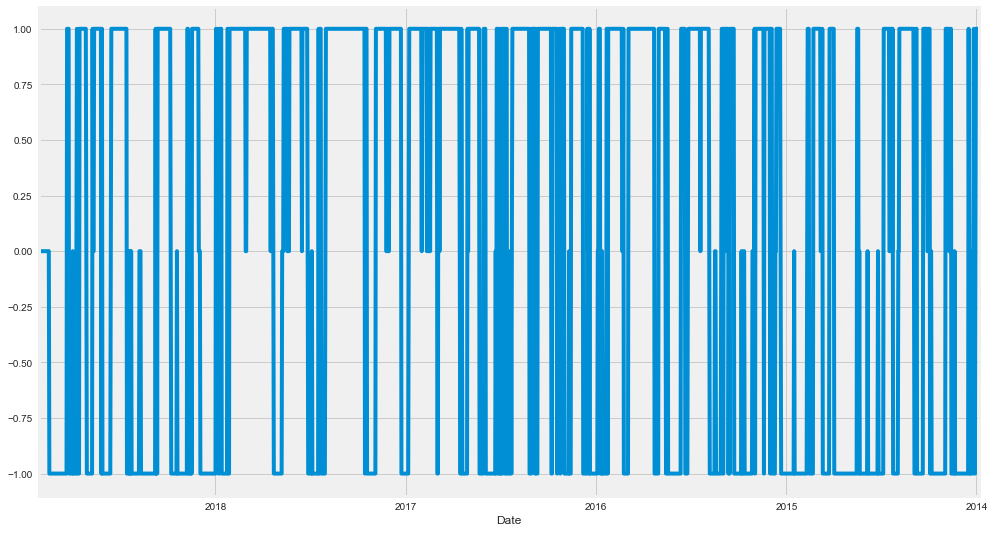

In [201]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)

Predict['Trading Signal'].plot()
# Predict.iplot(y=['Trading Signal'])

In [203]:
Predict['Trading Signal'].to_csv("trading signal")

### Bollinger Band Compare Bitcoin, Ethereum, Litecoin

In [205]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is C639-9E04

 Directory of C:\Users\vivid\Data\ML-Finance

12/07/2018  11:21 PM    <DIR>          .
12/07/2018  11:21 PM    <DIR>          ..
12/07/2018  10:35 PM    <DIR>          .ipynb_checkpoints
09/14/2018  09:56 AM         5,953,360 BITCOIN.xlsx
12/05/2018  09:47 PM           129,301 BITCOIN_Final.xlsx
12/07/2018  10:47 PM           246,108 Buy-hold.ipynb
09/14/2018  10:04 AM            77,951 ETHEREUM.xlsx
11/29/2018  05:23 PM            30,127 LITECOIN.xlsx
12/07/2018  11:21 PM           608,777 ML_Finance_Project_120118.ipynb
12/07/2018  10:35 PM           883,455 Moving Average Stratergy.ipynb
12/07/2018  10:11 PM           726,462 Random Forrest & Kalman Filter.ipynb
12/07/2018  11:21 PM            26,039 trading signal
09/15/2018  11:05 AM            59,351 Untitled.ipynb
09/22/2018  09:35 AM            24,915 Untitled1.ipynb
10/06/2018  10:59 AM            80,877 Untitled2.ipynb
10/06/2018  11:30 AM             3,054 Unt

In [185]:
#Loading all thea csv files
btc = pd.DataFrame(df_bitcoin['Close'])
df_ethereum.rename(columns={'Close**':'Close'}, inplace=True)
eth = pd.DataFrame(df_ethereum['Close'])
df_litecoin.rename(columns={'Close**':'Close'}, inplace=True)
ltc = pd.DataFrame(df_litecoin['Close'])

In [186]:
for item in (btc, eth, ltc):
    item['20 Day MA'] = item['Close'].rolling(window=20).mean()
    item['20 Day STD'] = item['Close'].rolling(window=20).std()
    item['Upper Band'] = item['20 Day MA'] + (item['20 Day STD'] * 2)
    item['Lower Band'] = item['20 Day MA'] - (item['20 Day STD'] * 2)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
btc[['Close', '20 Day MA', 'Upper Band', 'Lower Band']].iplot()

# plt.title('30 Day Bollinger Band for Bitcoin')
# plt.ylabel('Price (USD)')
# plt.show()

In [187]:
eth[['Close', '20 Day MA', 'Upper Band', 'Lower Band']].iplot()

In [188]:
ltc[['Close', '20 Day MA', 'Upper Band', 'Lower Band']].iplot()

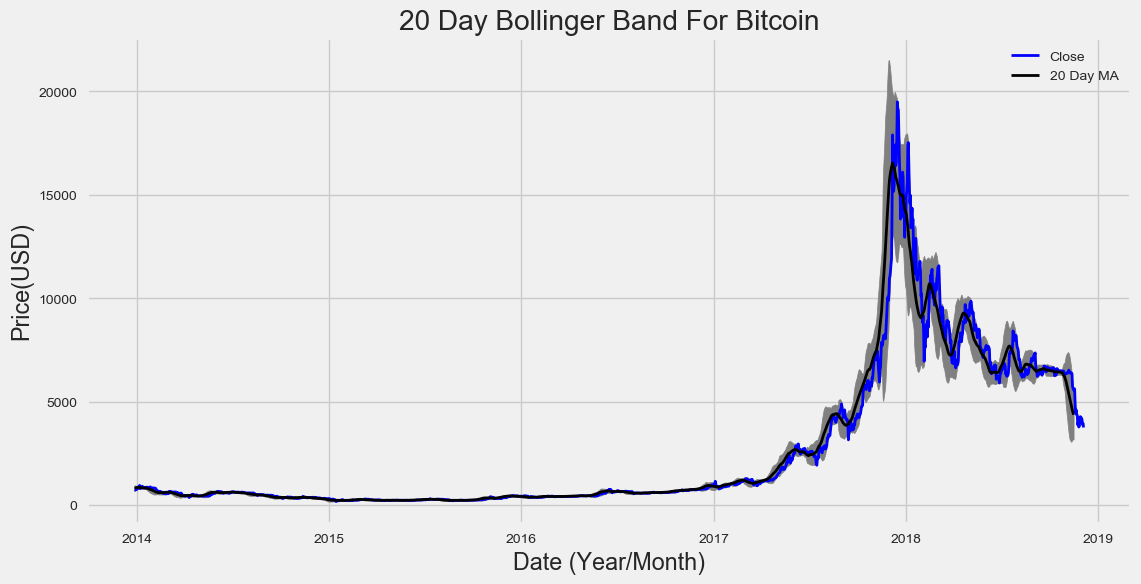

In [189]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = btc.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, btc['Upper Band'], btc['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, btc['Close'], color='blue', lw=2)
ax.plot(x_axis, btc['20 Day MA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('20 Day Bollinger Band For Bitcoin')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();